In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [3]:
train = pd.read_csv("train.csv",index_col='Id')
test = pd.read_csv("test.csv",index_col='Id')
data = pd.concat([train,test])

In [4]:
data = data.reset_index()

## Exploratory Data Analysis

C:\Users\PAARTH~1\AppData\Local\Temp/ipykernel_2400/1911712882.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))


<AxesSubplot:>

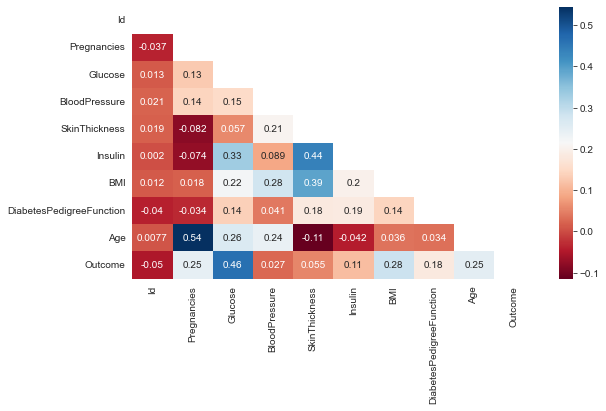

In [5]:
plt.figure(figsize=(9,5))
corr_mat = data.corr('pearson')
mask = np.triu(np.ones_like(corr_mat, dtype=np.bool))
sns.heatmap(corr_mat,cmap='RdBu',annot=True,mask=mask)

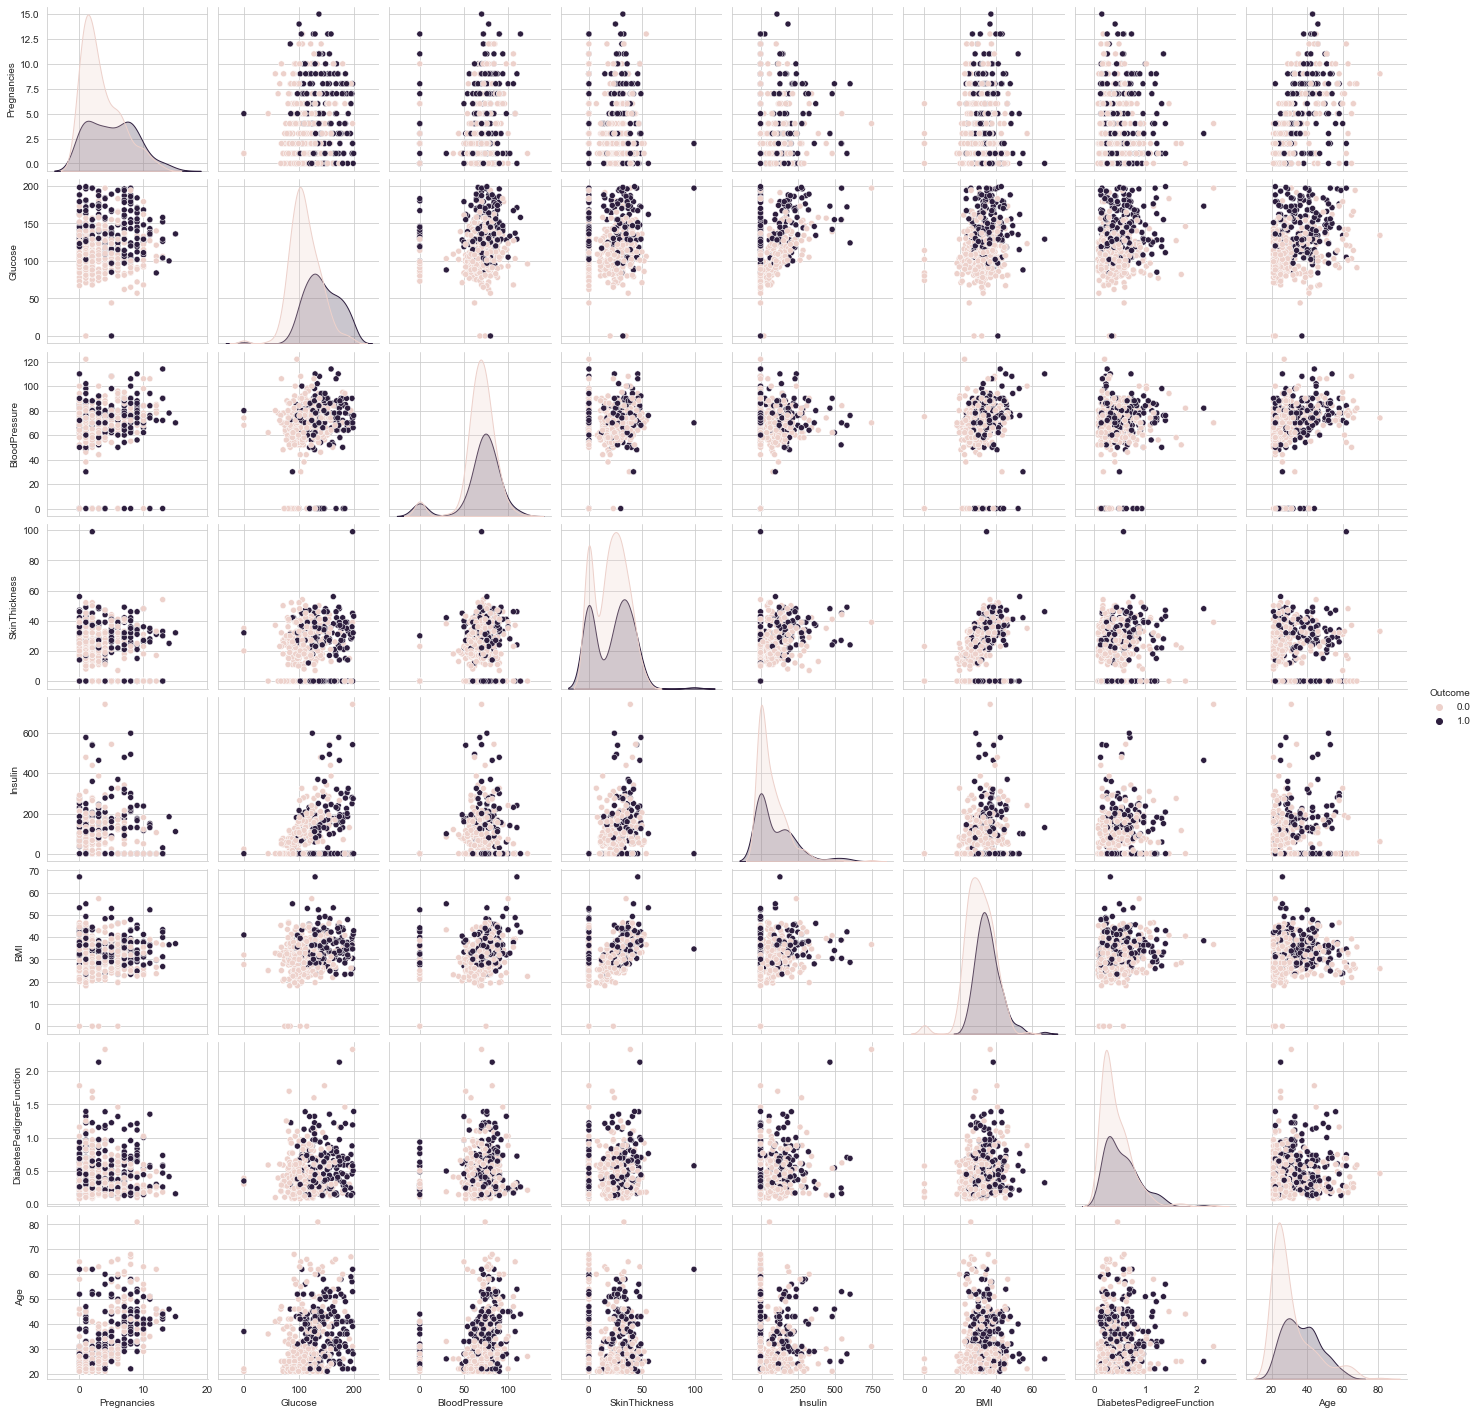

In [6]:
sns.pairplot(data,
             hue='Outcome',
             vars=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']);

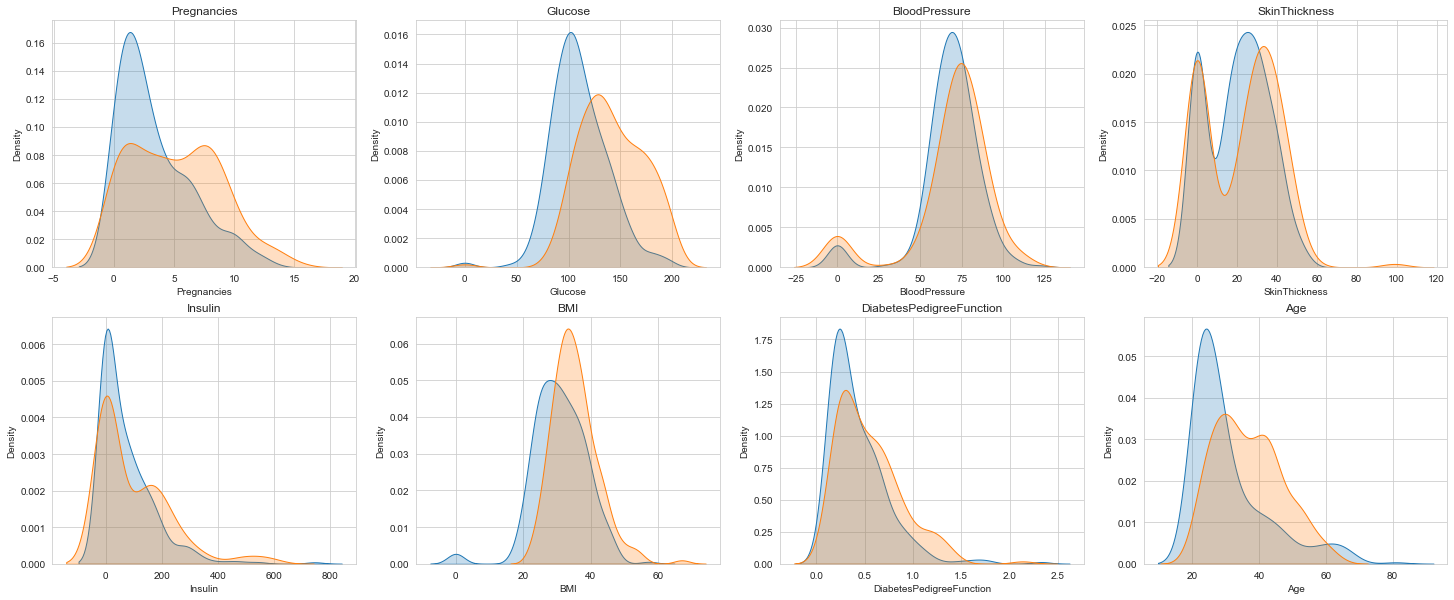

In [7]:
plt.figure(figsize=(25,10))
for i,col in enumerate(data.drop(columns=['Outcome','Id']).columns):
    plt.subplot(2,4,i+1)
    #sns.kdeplot(train[col])
    gr = data.groupby('Outcome')[col]
    for label, arr in gr:
        sns.kdeplot(arr, label=label,shade=True)
    plt.title(col)

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

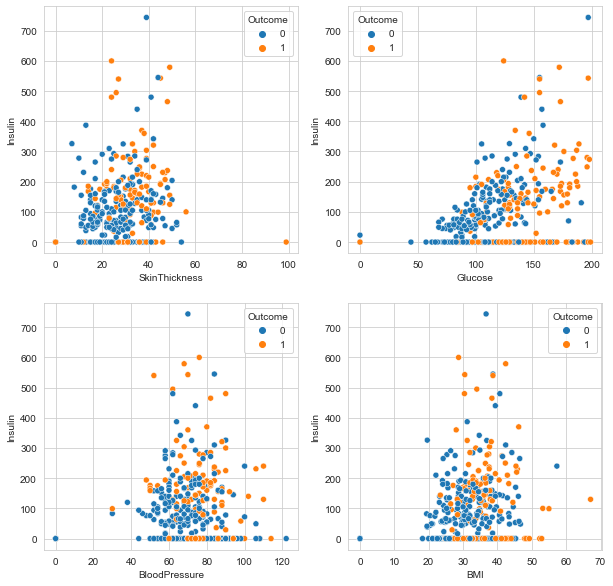

In [8]:
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
sns.scatterplot(x='SkinThickness',y='Insulin',hue='Outcome',data=train )

plt.subplot(2,2,2)
sns.scatterplot(x='Glucose',y='Insulin',data=train,hue='Outcome')

plt.subplot(2,2,3)
sns.scatterplot(x='BloodPressure',y='Insulin',data=train,hue='Outcome')

plt.subplot(2,2,4)
sns.scatterplot(x='BMI',y='Insulin',data=train,hue='Outcome')

C:\Users\Paarth Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Paarth Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Paarth Agrawal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

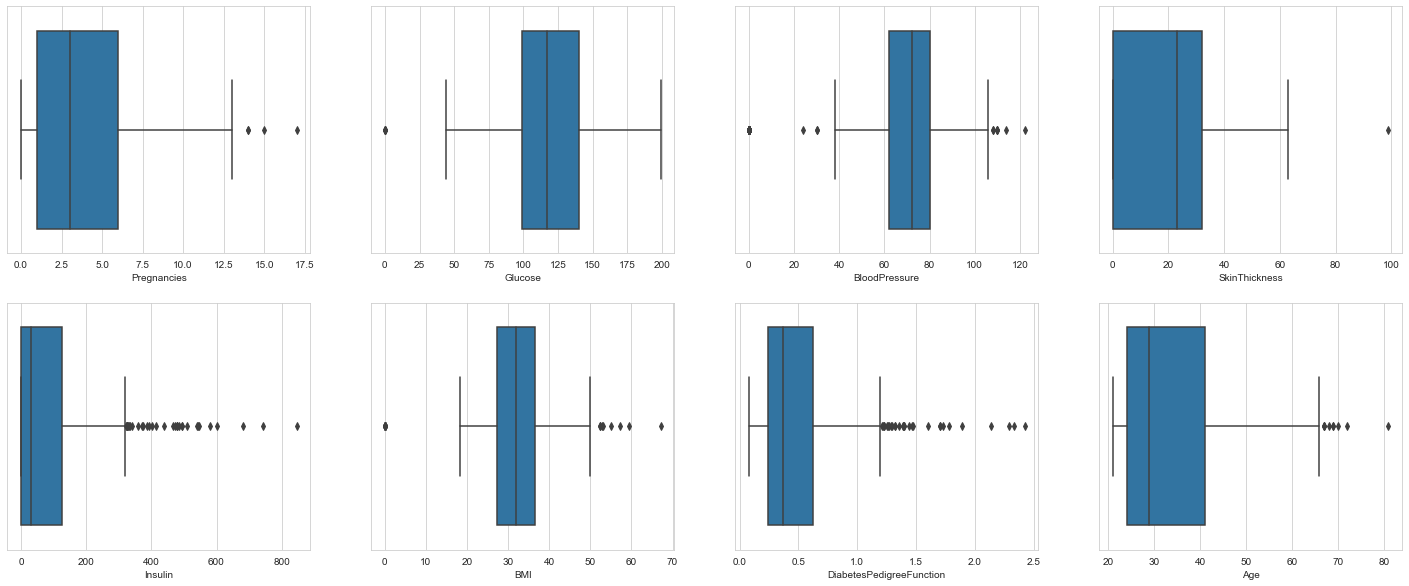

In [9]:
plt.figure(figsize=(25,10))
for i,col in enumerate(data.drop(columns=['Outcome','Id']).columns):
    plt.subplot(2,4,i+1)
    sns.boxplot(data[col])

## Feature Manipulation

In [10]:
data['Preg_Band']=pd.cut(data['Pregnancies'],
                               bins=[0,1,2,3,5,7,18],
                               labels = [0,1,2,3,4,5],include_lowest=True)
    
data['Pedigree_Band'] = pd.cut(data['DiabetesPedigreeFunction'],
                                    bins=[0,0.25,0.5,0.75,1,1.5,7],
                                   labels=[0,1,2,3,4,5])
data['Insulin_Band'] = pd.cut(data['Insulin'],
                                   bins=[0,50,100,150,300,800],
                                  labels=[0,1,2,3,4],include_lowest=True)
    
data['Glucose_Band'] = pd.cut(data['Glucose'],
                                   bins=[0,50,100,125,150,300],
                                  labels=[0,1,2,3,4],include_lowest=True)

In [11]:
data

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Preg_Band,Pedigree_Band,Insulin_Band,Glucose_Band
0,0,6,148,72,35,0,33.6,0.627,50,1.0,4,2,0,3
1,2,8,183,64,0,0,23.3,0.672,32,1.0,5,2,0,4
2,3,1,89,66,23,94,28.1,0.167,21,0.0,0,0,1,1
3,7,10,115,0,0,0,35.3,0.134,29,0.0,5,0,0,2
4,8,2,197,70,45,543,30.5,0.158,53,1.0,1,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,758,1,106,76,0,0,37.5,0.197,26,NaN,0,0,0,2
764,759,6,190,92,0,0,35.5,0.278,66,NaN,4,1,0,4
765,764,2,122,70,27,0,36.8,0.340,27,NaN,1,1,0,2
766,765,5,121,72,23,112,26.2,0.245,30,NaN,3,0,2,2


In [12]:
data.drop(columns=['Pregnancies','DiabetesPedigreeFunction','Insulin','Glucose'],inplace=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             768 non-null    int64   
 1   BloodPressure  768 non-null    int64   
 2   SkinThickness  768 non-null    int64   
 3   BMI            768 non-null    float64 
 4   Age            768 non-null    int64   
 5   Outcome        466 non-null    float64 
 6   Preg_Band      768 non-null    category
 7   Pedigree_Band  768 non-null    category
 8   Insulin_Band   767 non-null    category
 9   Glucose_Band   768 non-null    category
dtypes: category(4), float64(2), int64(4)
memory usage: 40.0 KB


In [14]:
data.loc[:,'Preg_Band':'Glucose_Band'] = data.loc[:,'Preg_Band':'Glucose_Band'].fillna(0).astype(int)

In [15]:
train = data.loc[data['Outcome'] <= 1,:]
test = data.loc[data['Outcome'].isna(),:]

In [16]:
X = train.drop(['Outcome','Id'],axis=1)
y = train['Outcome']

indexes = test['Id']
test = test.drop(['Outcome','Id'],axis=1)

## Modelling

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [18]:
X_test.head()

,BloodPressure,SkinThickness,BMI,Age,Preg_Band,Pedigree_Band,Insulin_Band,Glucose_Band
55,78,26,29.3,36,4,3,1,1
63,72,0,23.8,60,3,1,0,3
33,70,27,28.0,22,1,2,0,1
461,58,26,28.4,22,1,3,0,1
72,58,31,34.3,25,2,1,0,1


In [19]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(5),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    #print("="*30)
    #print(name)
    
    #print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    #print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    #print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
#print("="*30)

C:\Users\Paarth Agrawal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


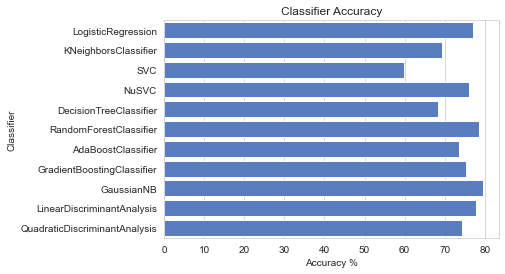

In [20]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

In [21]:
log.sort_values(by='Accuracy')

,Classifier,Accuracy,Log Loss
0,SVC,59.829060,0.651536
0,DecisionTreeClassifier,68.376068,10.922519
0,KNeighborsClassifier,69.230769,2.234195
0,AdaBoostClassifier,73.504274,0.627036
0,QuadraticDiscriminantAnalysis,74.358974,0.535365
0,GradientBoostingClassifier,75.213675,0.542245
0,NuSVC,76.068376,0.475483
0,LogisticRegression,76.923077,0.468449
0,LinearDiscriminantAnalysis,77.777778,0.467843
0,RandomForestClassifier,78.632479,0.474829


In [22]:
gnb =  GaussianNB()
gnb.fit(X,y)
preds = gnb.predict(test)

In [23]:
submission = pd.DataFrame({
    'Id' : indexes ,
    'Outcome' : preds
})
submission

,Id,Outcome
466,1,0.0
467,4,1.0
468,5,0.0
469,6,0.0
470,9,0.0
...,...,...
763,758,0.0
764,759,1.0
765,764,0.0
766,765,0.0


In [25]:
submission.to_csv('Submission.csv',index=False)